# Supervised Learning: Classification


## Supervised Learning

- **Classification** is a form of data analysis that extracts models describing important data classes.


- Such models, called **classifiers**, predict categorical (discrete, unordered) **class labels**.
  - For example, we can build a classification model to categorize bank loan applications as either safe or risky.

- In contrast, **regression analysis** is a statistical methodology that is most often used for **numeric prediction**


- Data classification is a two-step process, consisting of a **learning/training step** (where a classification model is constructed) and a **classification step** (where the model is used to predict class labels for given data).


- **Training Step**
  - A tuple, X, is represented by an n-dimensional attribute vector.
  - plus a class label attribute


- Because the class label of each training tuple is provided, this step is also known as **supervised learning**
  - It contrasts with unsupervised learning (or clustering)


- **Classification/Test Step**
  - The **accuracy** of a classifier on a given test set is the percentage of test set tuples that are correctly classified by the classifier.


# Wine dataset

Url: http://archive.ics.uci.edu/ml/datasets/Wine


These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


The attributes are:

0. Quality (1-3)
1. Alcohol
1. Malic acid
1. Ash
1. Alcalinity of ash
1. Magnesium
1. Total phenols
1. Flavanoids
1. Nonflavanoid phenols
1. Proanthocyanins
1. Color intensity
1. Hue
1. OD280/OD315 of diluted wines
1. Proline


In [1]:
import numpy as np
import pandas as pd

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(data_url, header=None)

In [ ]:
df.head()

In [ ]:
df.describe().T

In [ ]:
df.info()

In [ ]:
# data preparation
# convert to float to have precise and homogenoues computation
dataset = df.astype(float)
print("dataset shape", dataset.shape)

# get features by removing class label
# remove id
X = dataset.loc[:,1:]
print("X shape", X.shape)

# get class label
y = dataset.loc[:,0]
print("y shape", y.shape)

In [ ]:
X.head()

In [ ]:
y.head()

## Train vs. Test

We simulate novel/unknown instances by splitting the available data in to a **training** and a **test** set.

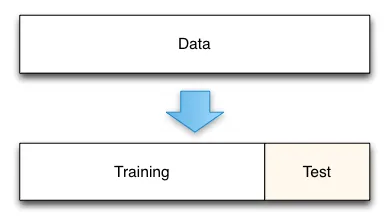

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print (X_train.shape, X_test.shape)

## k-Nearest-Neighbor Classifier


- lazy learner
- Nearest-neighbor classifiers are based on learning by analogy, that is, by comparing a given test tuple with training tuples that are similar to it.
- Scikit Learn:
    - see https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    - by default Euclidean distance is used


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create the classifier
kNN = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
kNN.fit(X_train,y_train)

# Generate predictions
y_pred = kNN.predict(X_test)

# compute Accuracy
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print (f"Accuracy {acc:.3f}")

## What's the impact of k?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1,11):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train,y_train)
    y_pred = kNN.predict(X_test)

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print (f"k: {k:2d} | Accuracy {acc:.3f}" )

## Choosing the value of K:   

- If K too small, sensitive to noise points   
- If K too large, it can be computationally expensive
    - what if K is very large, e.g., $+\infty$?
  
  
- **Distance weighting**:
  - weight factor, $w = 1/d^2$


- **Exercise: experiment distance weighting**
    - see https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

## How is this sensible to distances?

In [ ]:
for f in X.columns:
    print ("Feature {:2d} -> Scale: {:7.2f}".format(f, X.loc[:,f].max() - X.loc[:,f].min()) )

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

for k in range(1,11):

    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit( scaler.transform(X_train), y_train )
    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

for k in range(1,11):

    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(scaler.transform(X_train),y_train)
    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )

- Best scaling depends on data
  - **StandardScaler** and **MinMaxScaling** are both sensitive to outliers
  - **StandardScaler** when we have a Gaussian distribution, e.g., age
  - **MinMaxScaling** when we do not have a Gaussian distribution, e.g., pixel colors in a image
- Euclidean Distance assumes all features are equally important, and this is usually not the case


## It might be a good idea to weigh features according to some domain knowledge

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

def my_distance(a,b):
    return 10*abs(a[0]-b[0]) + abs(a[1]-b[1])

for k in range(1,11):

    kNN = KNeighborsClassifier(n_neighbors = k,
                                         metric = my_distance)
    kNN.fit( X_train ,y_train)
    y_pred = kNN.predict( X_test )

    # compute accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )

<div class="alert alert-warning" role="alert">

## Computational Complexity

- $O(k \log N)$ with multi-dimensional search trees
- Additional speed-up with
  - cluster-based pre-filtering

</div>     



# Let's wrap-up with 2-dimensional data

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES,
                            centers=N_CENTERS, cluster_std=1,
                            random_state=22222222)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

X_train, X_test, y_train, y_test = train_test_split(X, labels_true,
                                                    test_size=0.33,
                                                    random_state=42)

kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit( X_train, y_train )
y_pred = kNN.predict( X_test )

# compute accuracy
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )

# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.1)
ax.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker='+');

Let's show the decision boundary

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay


N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES,
                            centers=N_CENTERS, cluster_std=1,
                            random_state=22222222)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

X_train, X_test, y_train, y_test = train_test_split(X, labels_true,
                                                    test_size=0.33,
                                                    random_state=42)

# Try changing the number of neighbours
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit( X_train ,y_train)

fig, ax = plt.subplots(figsize=(6,6))

disp = DecisionBoundaryDisplay.from_estimator(
    kNN, X_train,
    grid_resolution = 30,
    alpha=0.3, ax = ax)

ax.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor="k", alpha=0.5)
plt.show()


## References

- **Introduction to Data Mining (Second Edition)**. , Kumar et al.
  - Chapter 4: Classification: Basic Concepts, Decision Trees, and Model Evaluation
    - until 4.3 included
  - Section 5.2: Nearest-Neighbor classifiers


- **Python Data Science Handbook**. O’Reilly. 2016
  - Chapter 5: Machine Learning - Introducing Scikit-Learn
  
